# Import packages and Settings

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Training Data

In [17]:
train_data = pd.read_csv('./Data/train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [21]:
test_data = pd.read_csv('./Data/test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [22]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [23]:
test_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


## Univariate Analysis

<Axes: >

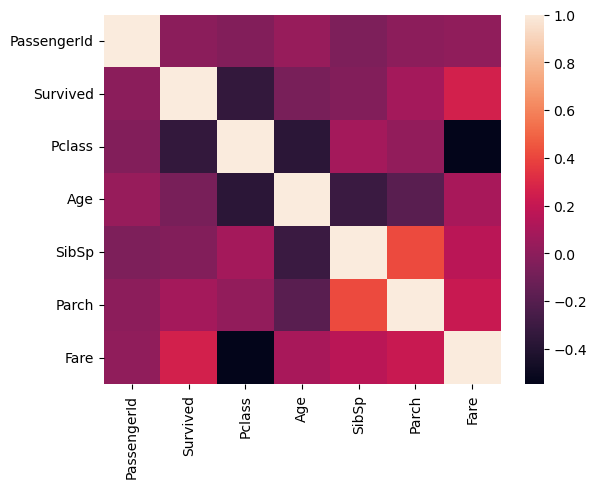

In [24]:
corr = train_data.select_dtypes(exclude='O').corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [25]:
corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [26]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [27]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [28]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [29]:
train_data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [30]:
train_data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [31]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: >

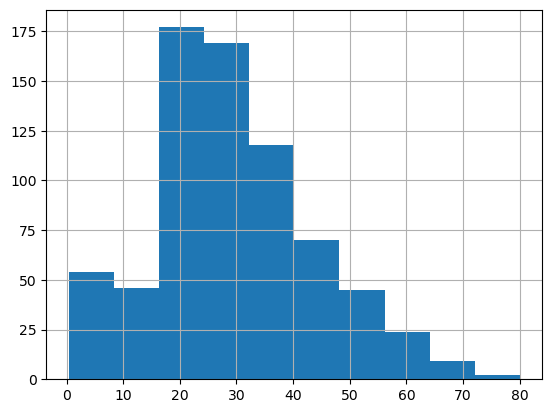

In [32]:
train_data['Age'].hist()

<Axes: >

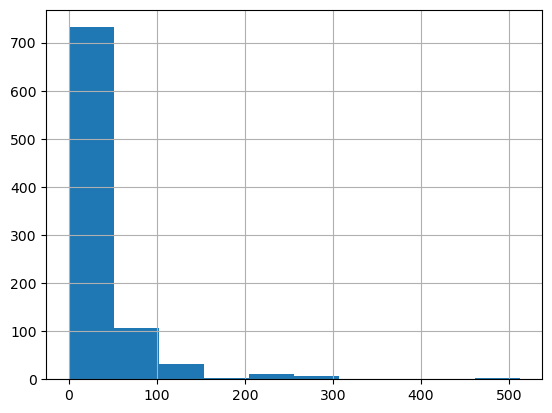

In [33]:
train_data['Fare'].hist()

## Multivariate Analysis

### Two Variables

In [34]:
train_data[['Survived', 'Pclass']].groupby(['Pclass']).mean().sort_values('Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [35]:
train_data[['Survived', 'Sex']].groupby(['Sex']).mean().sort_values('Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [36]:
train_data[['Survived', 'SibSp']].groupby(['SibSp']).mean().sort_values('Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [37]:
train_data[['Survived', 'Parch']].groupby(['Parch']).mean().sort_values('Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [38]:
train_data[['Survived', 'Embarked']].groupby(['Embarked']).mean().sort_values('Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<Axes: xlabel='Age', ylabel='Count'>

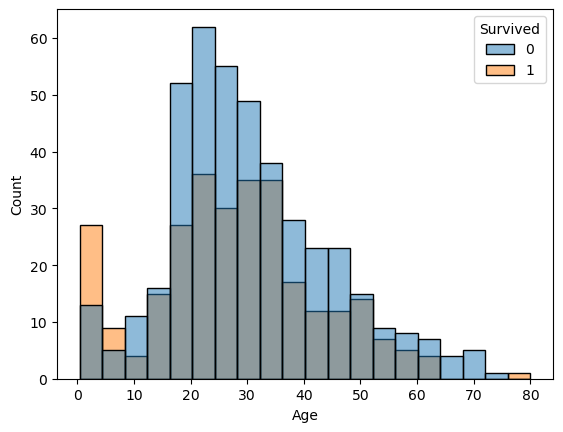

In [39]:
sns.histplot(train_data, x='Age', hue='Survived')

<Axes: xlabel='Fare', ylabel='Count'>

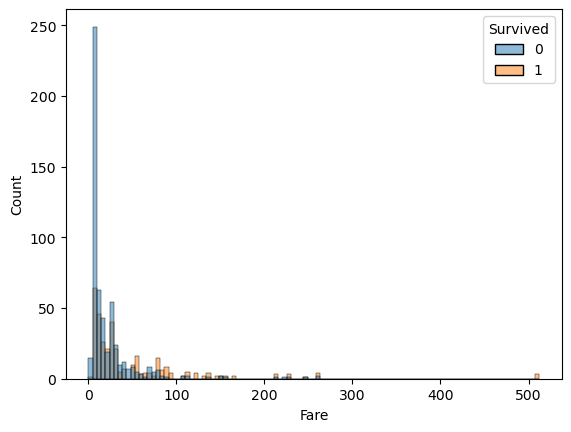

In [40]:
sns.histplot(train_data, x='Fare', hue='Survived')

### Three Variables

#### Sex

<Axes: xlabel='Pclass', ylabel='Survived'>

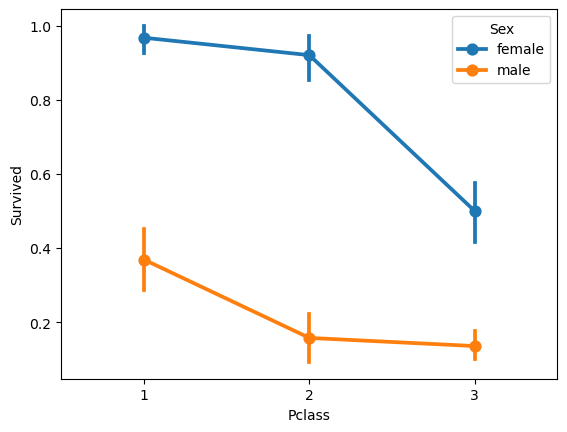

In [41]:
sns.pointplot(train_data, x='Pclass', y='Survived', hue='Sex')

<Axes: xlabel='SibSp', ylabel='Survived'>

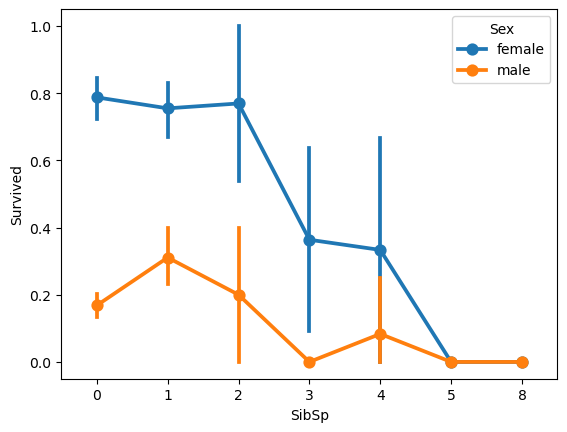

In [42]:
sns.pointplot(train_data, x='SibSp', y='Survived', hue='Sex')

<Axes: xlabel='Parch', ylabel='Survived'>

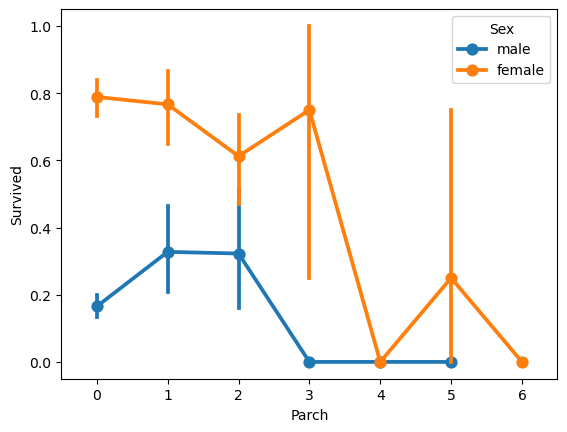

In [43]:
sns.pointplot(train_data, x='Parch', y='Survived', hue='Sex')

<Axes: xlabel='Embarked', ylabel='Survived'>

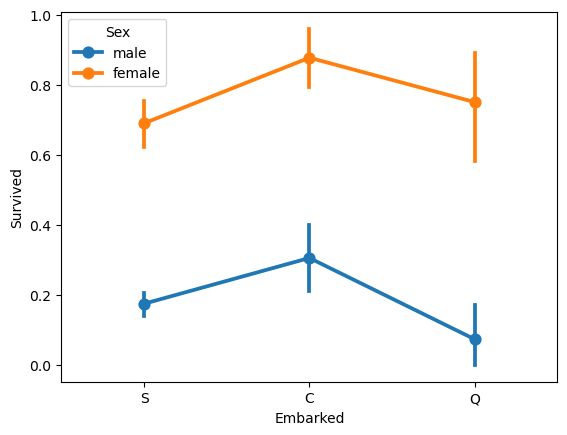

In [44]:
sns.pointplot(train_data, x='Embarked', y='Survived', hue='Sex')

#### Pclass

<Axes: xlabel='SibSp', ylabel='Survived'>

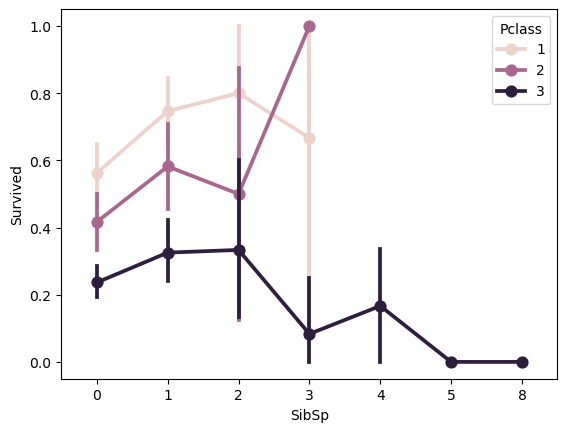

In [45]:
sns.pointplot(train_data, x='SibSp', y='Survived', hue='Pclass')

<Axes: xlabel='Parch', ylabel='Survived'>

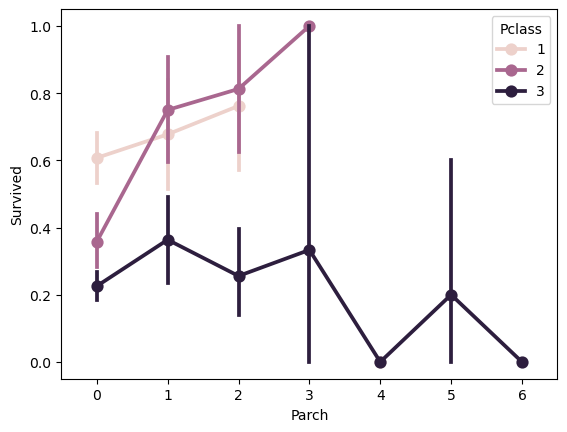

In [46]:
sns.pointplot(train_data, x='Parch', y='Survived', hue='Pclass')

<Axes: xlabel='Embarked', ylabel='Survived'>

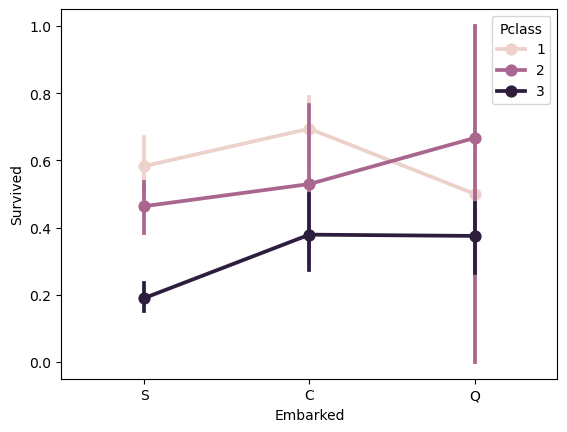

In [47]:
sns.pointplot(train_data, x='Embarked', y='Survived', hue='Pclass')

#### Embarked

<Axes: xlabel='SibSp', ylabel='Survived'>

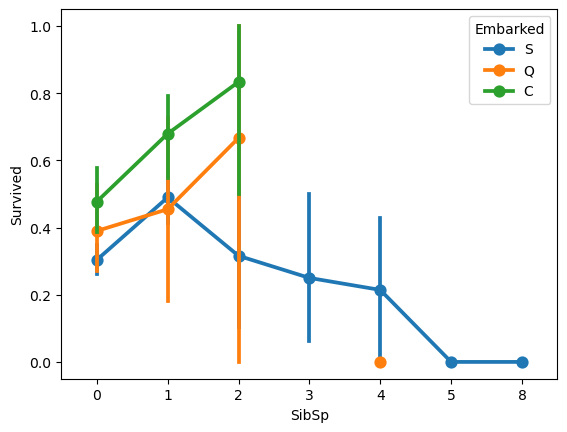

In [48]:
sns.pointplot(train_data, x='SibSp', y='Survived', hue='Embarked')

<Axes: xlabel='Parch', ylabel='Survived'>

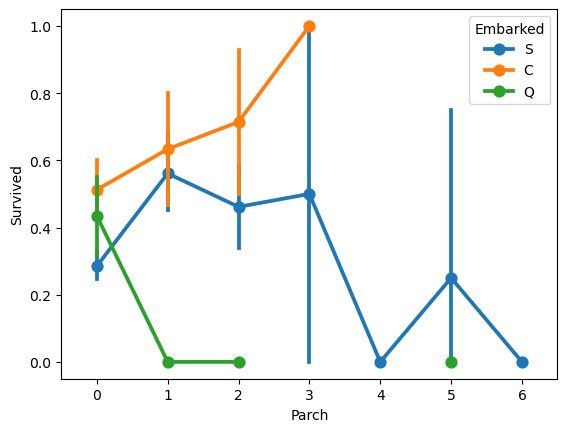

In [49]:
sns.pointplot(train_data, x='Parch', y='Survived', hue='Embarked')

#### Age

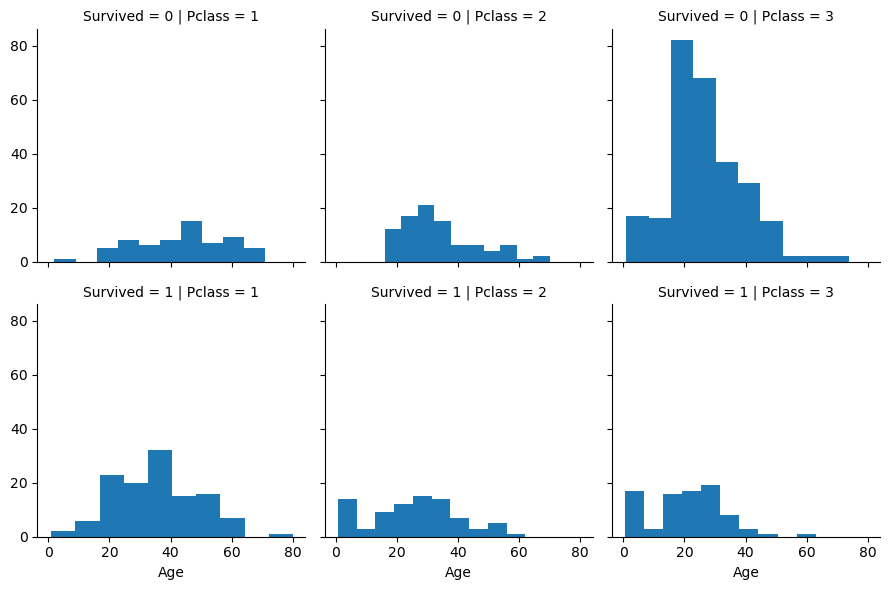

In [50]:
graph = sns.FacetGrid(train_data, row='Survived', col='Pclass')
graph.map(plt.hist, 'Age')

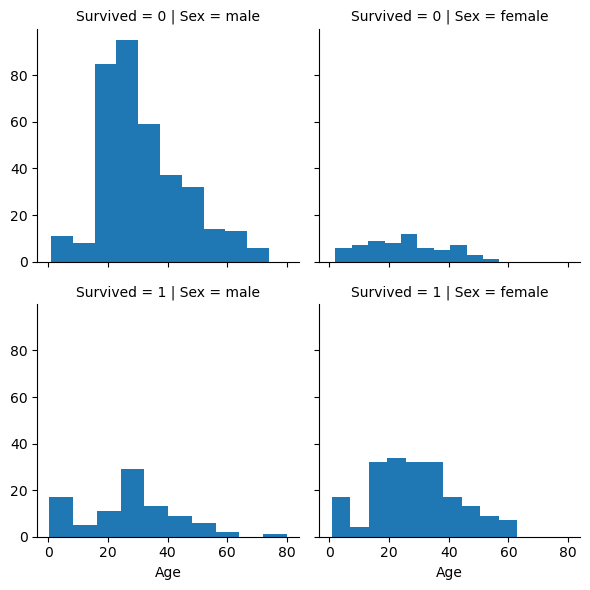

In [51]:
graph = sns.FacetGrid(train_data, row='Survived', col='Sex')
graph.map(plt.hist, 'Age')

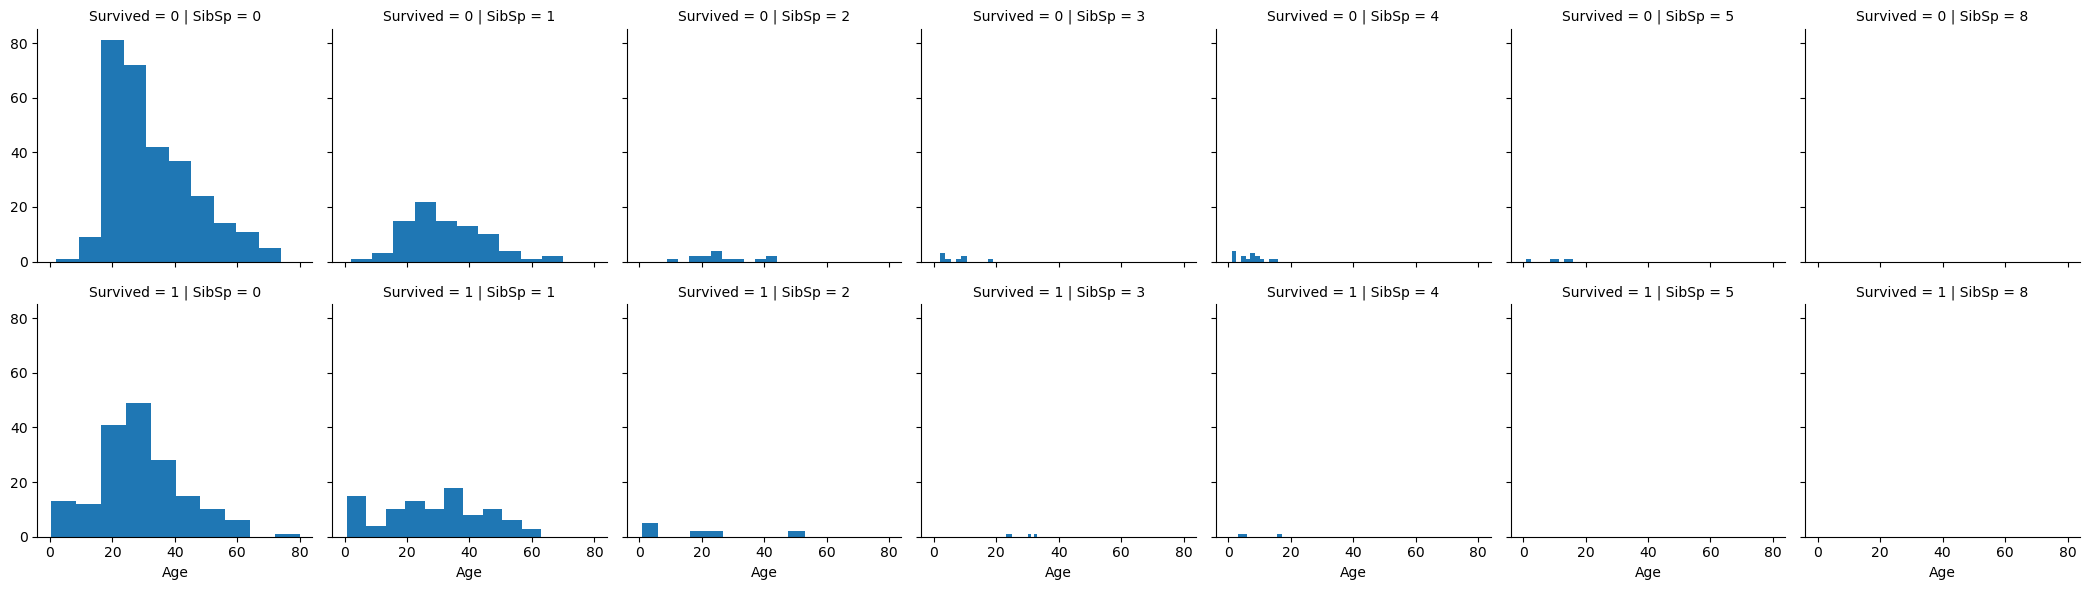

In [52]:
graph = sns.FacetGrid(train_data, row='Survived', col='SibSp', dropna=True)
graph.map(plt.hist, 'Age')

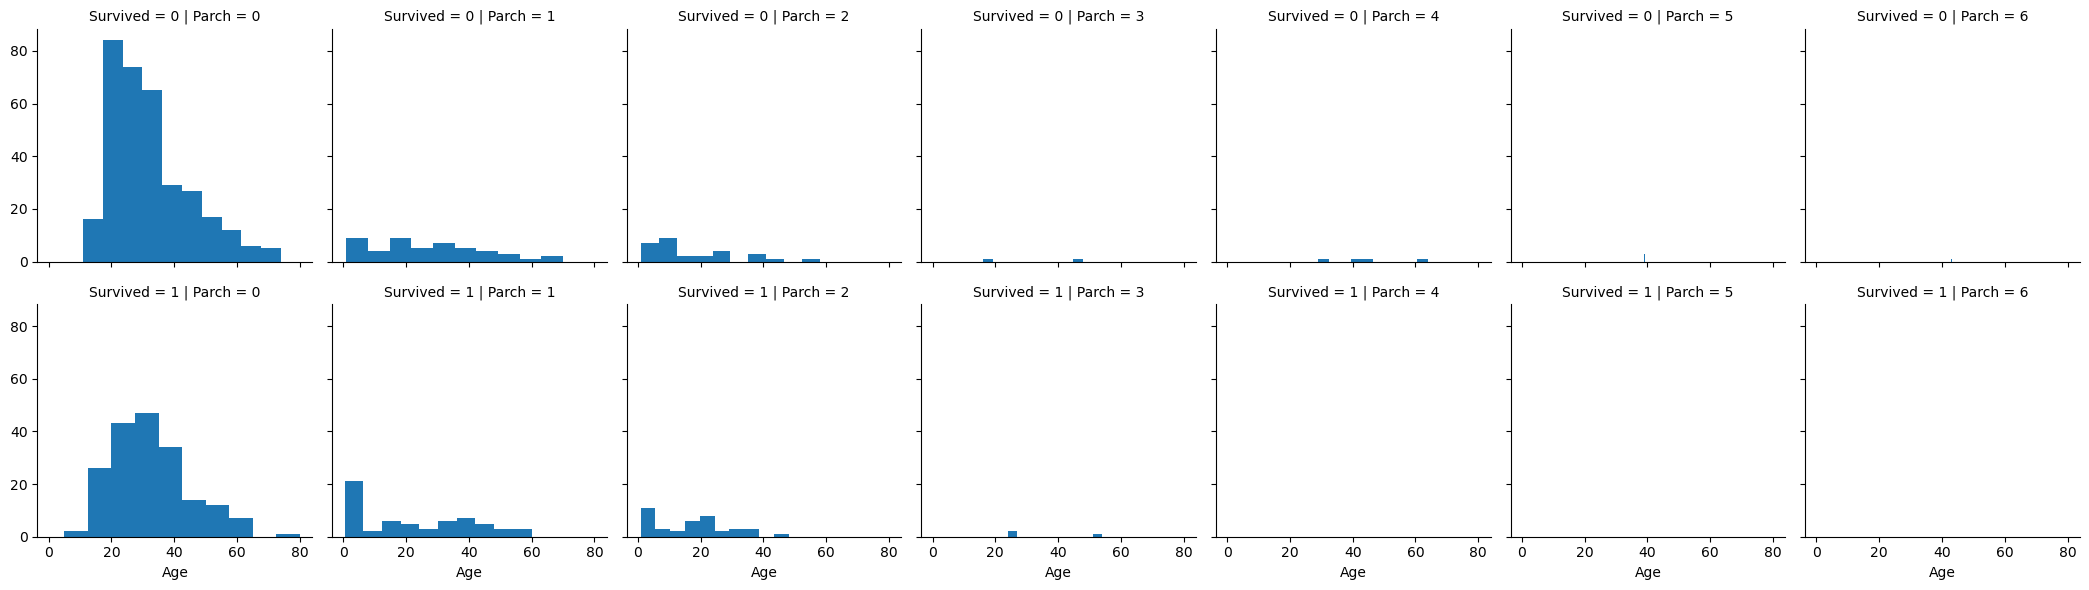

In [53]:
graph = sns.FacetGrid(train_data, row='Survived', col='Parch', dropna=True)
graph.map(plt.hist, 'Age')

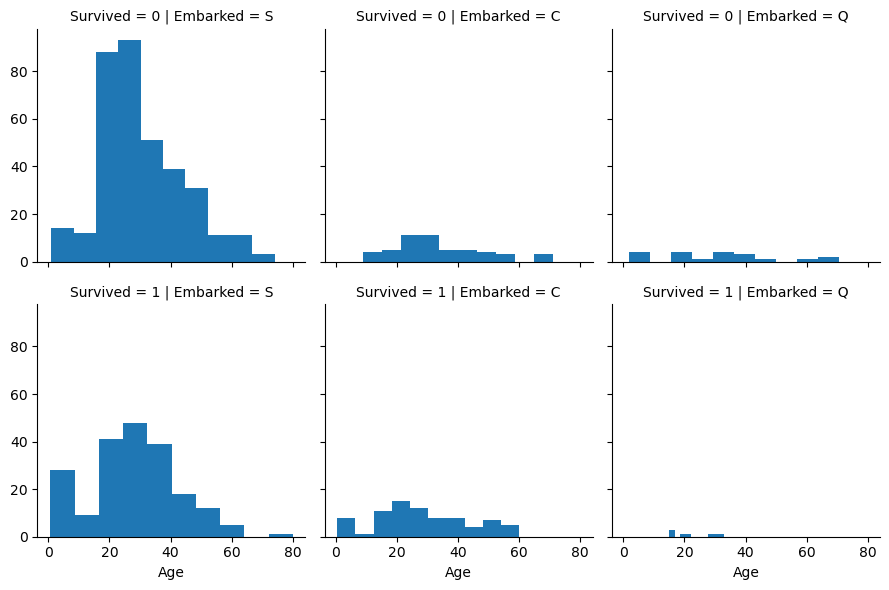

In [54]:
graph = sns.FacetGrid(train_data, row='Survived', col='Embarked')
graph.map(plt.hist, 'Age')

#### Fare

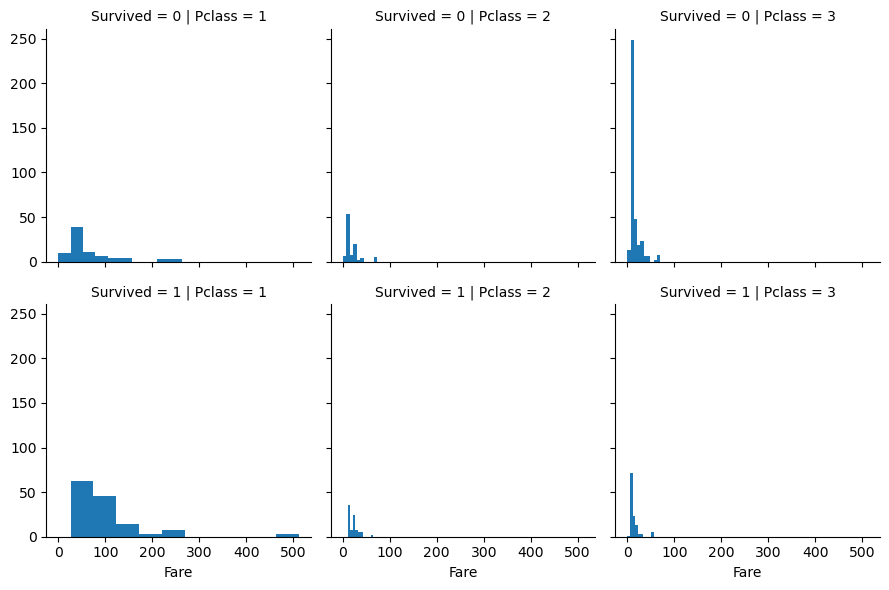

In [55]:
graph = sns.FacetGrid(train_data, row='Survived', col='Pclass')
graph.map(plt.hist, 'Fare')

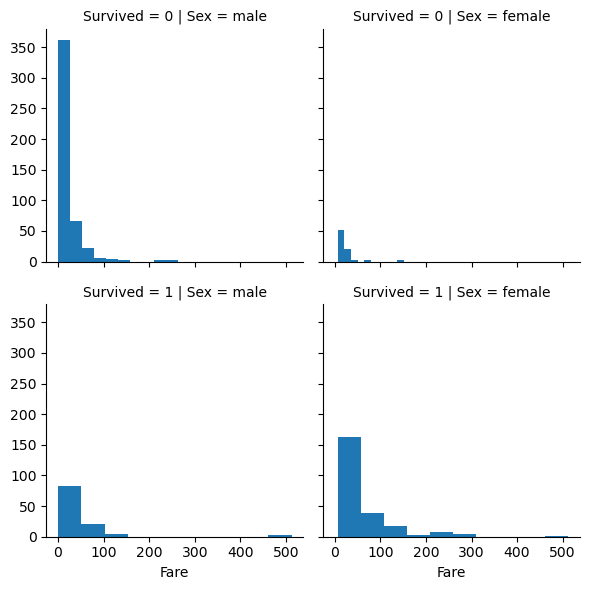

In [56]:
graph = sns.FacetGrid(train_data, row='Survived', col='Sex')
graph.map(plt.hist, 'Fare')

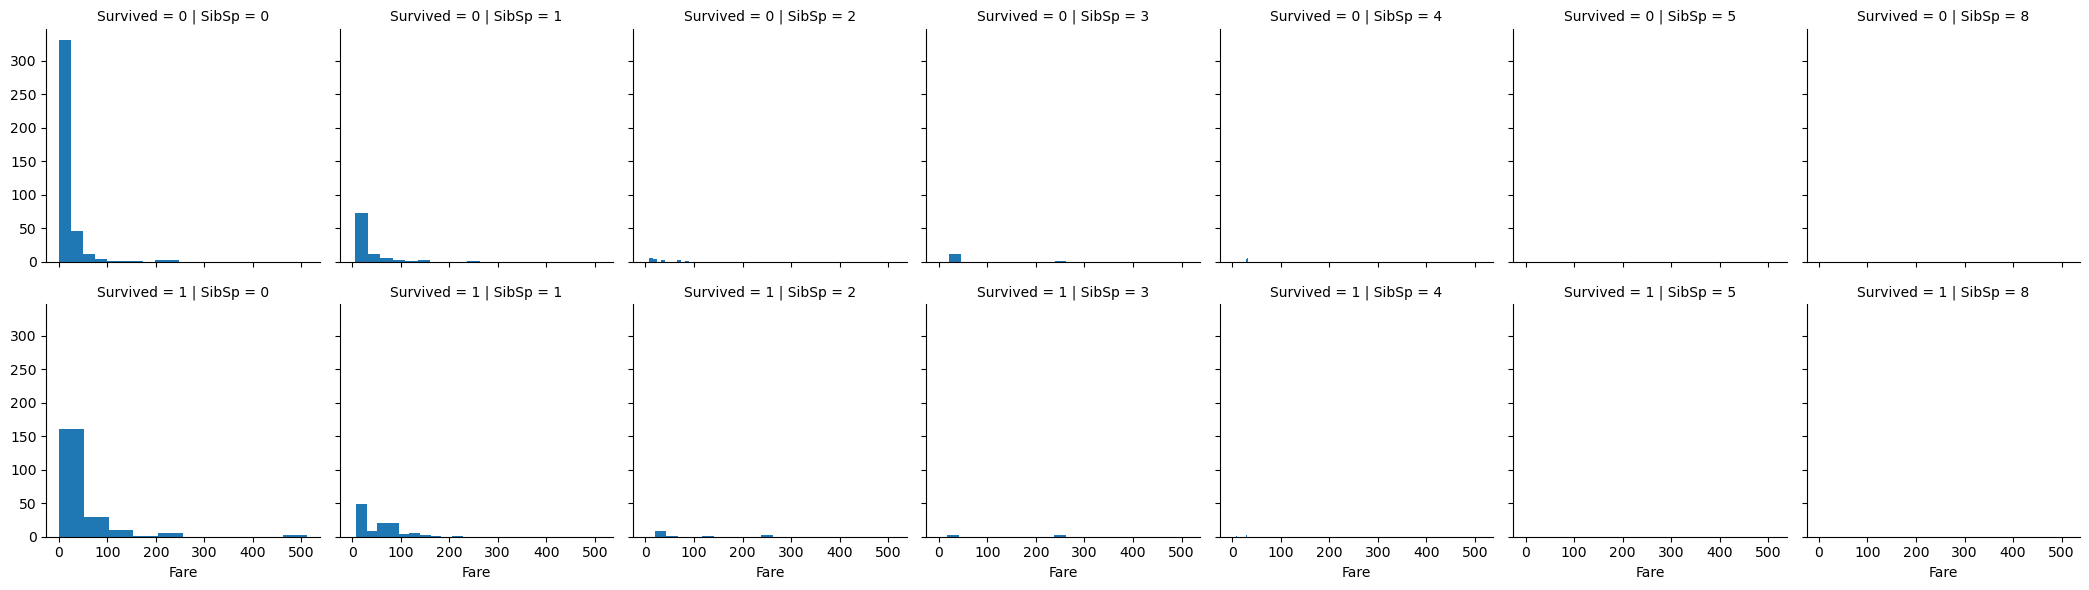

In [57]:
graph = sns.FacetGrid(train_data, row='Survived', col='SibSp', dropna=True)
graph.map(plt.hist, 'Fare')

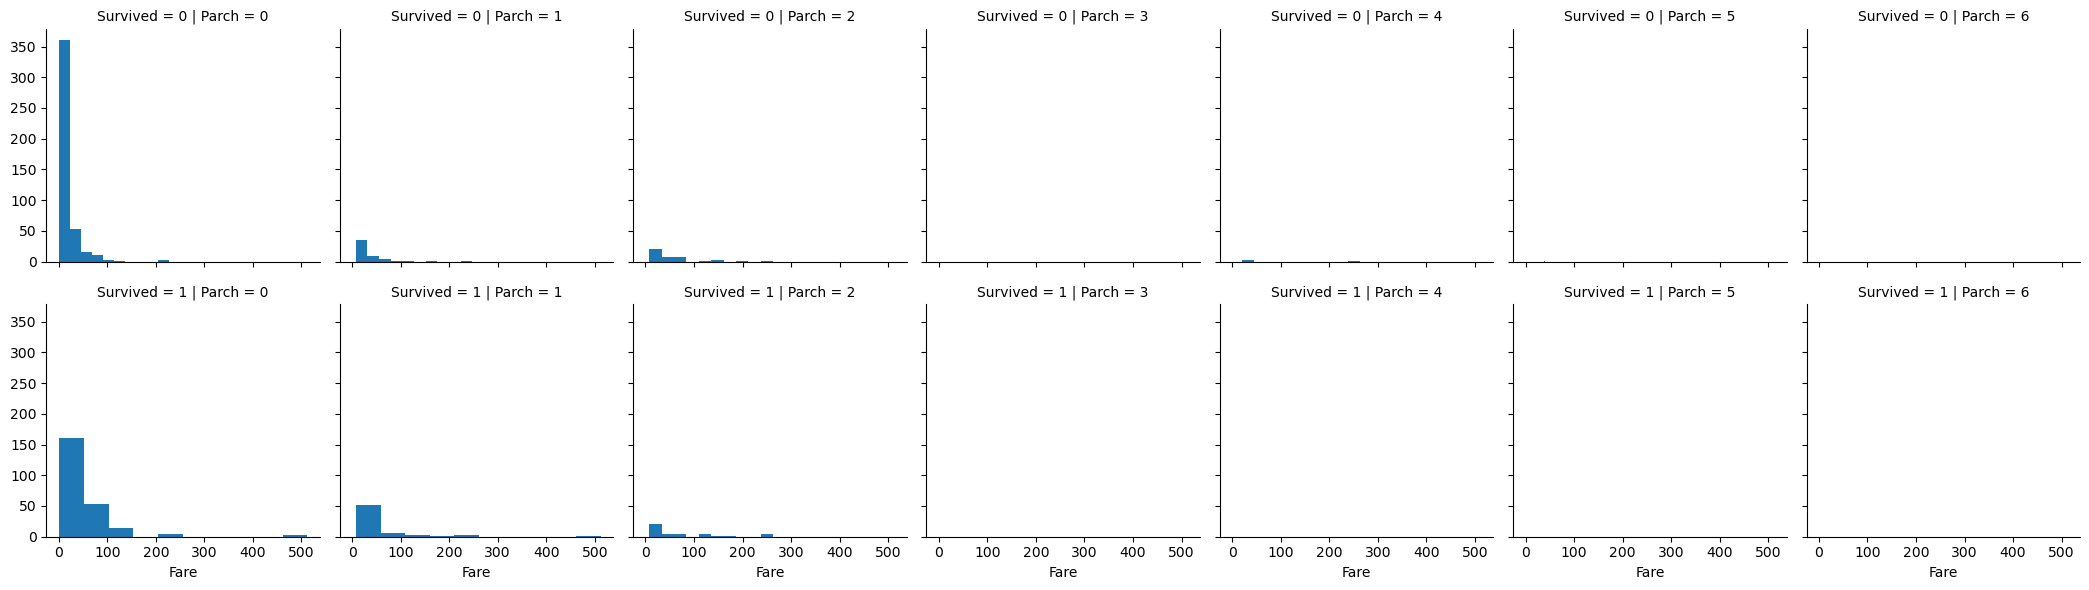

In [58]:
graph = sns.FacetGrid(train_data, row='Survived', col='Parch', dropna=True)
graph.map(plt.hist, 'Fare')

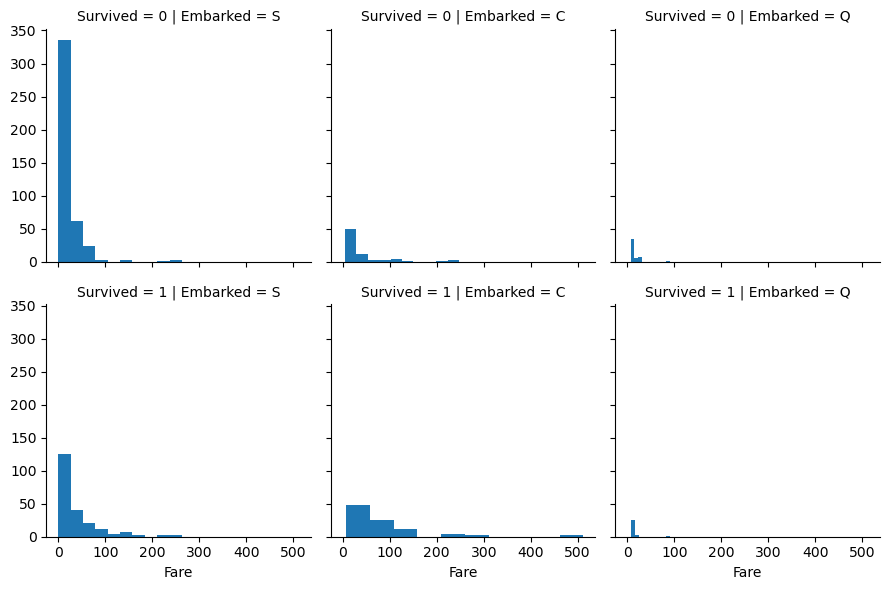

In [59]:
graph = sns.FacetGrid(train_data, row='Survived', col='Embarked')
graph.map(plt.hist, 'Fare')

## New Variable

### Title

In [60]:
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
train_data['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [61]:
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [62]:
train_data['Title'] = train_data['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data[['Title', 'Survived']].groupby(['Title']).mean().sort_values('Survived', ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


<Axes: xlabel='Pclass', ylabel='Survived'>

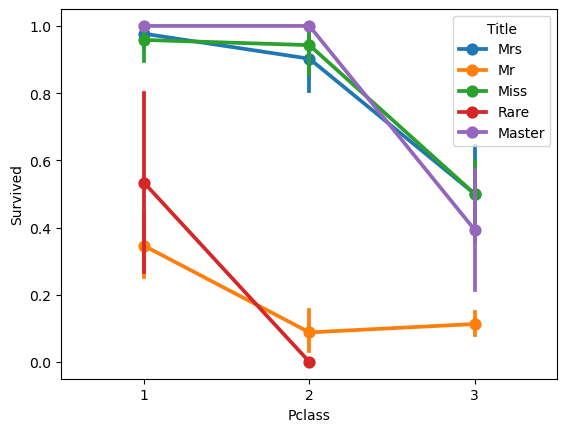

In [63]:
sns.pointplot(train_data, x='Pclass', y='Survived', hue='Title')

<Axes: xlabel='SibSp', ylabel='Survived'>

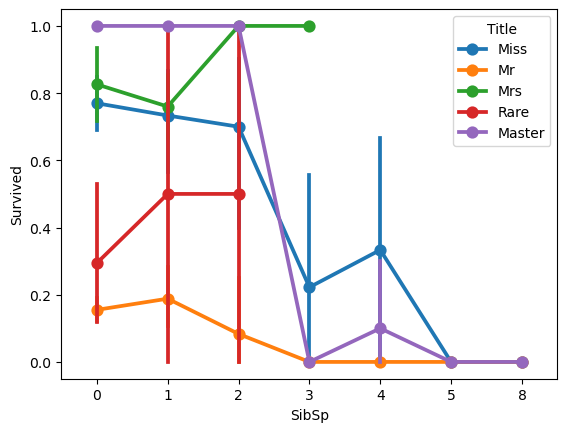

In [64]:
sns.pointplot(train_data, x='SibSp', y='Survived', hue='Title')

<Axes: xlabel='Parch', ylabel='Survived'>

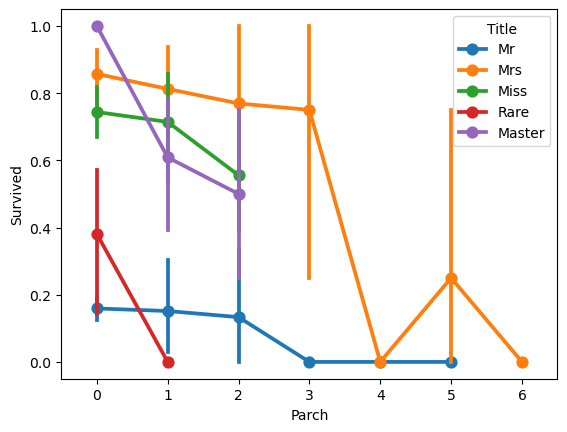

In [65]:
sns.pointplot(train_data, x='Parch', y='Survived', hue='Title')

<Axes: xlabel='Embarked', ylabel='Survived'>

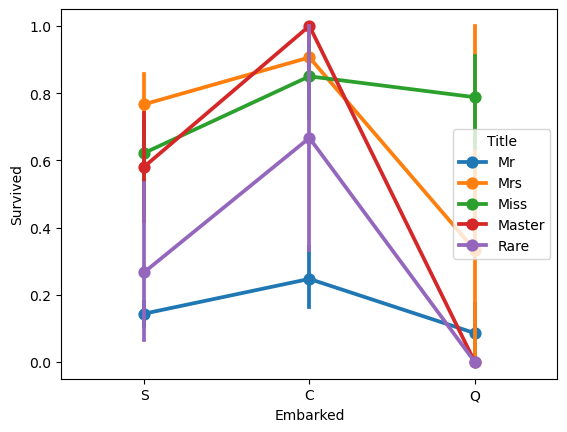

In [66]:
sns.pointplot(train_data, x='Embarked', y='Survived', hue='Title')

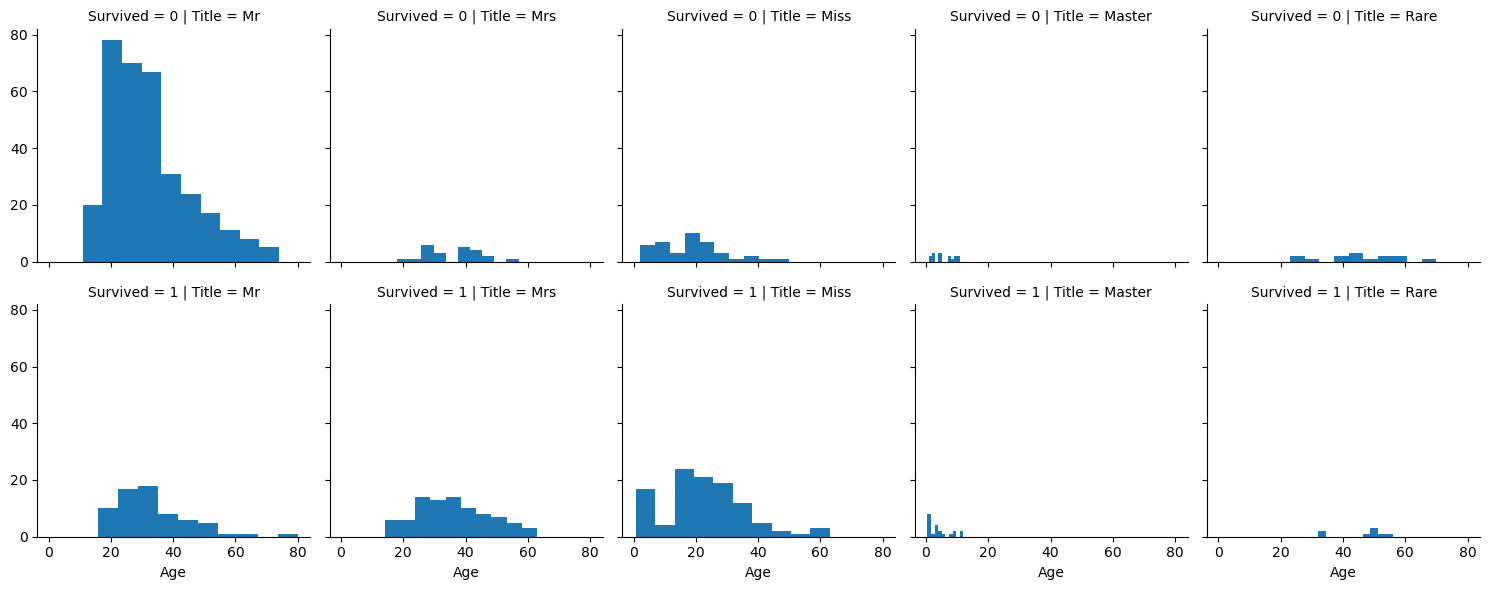

In [67]:
graph = sns.FacetGrid(train_data, row='Survived', col='Title')
graph.map(plt.hist, 'Age')

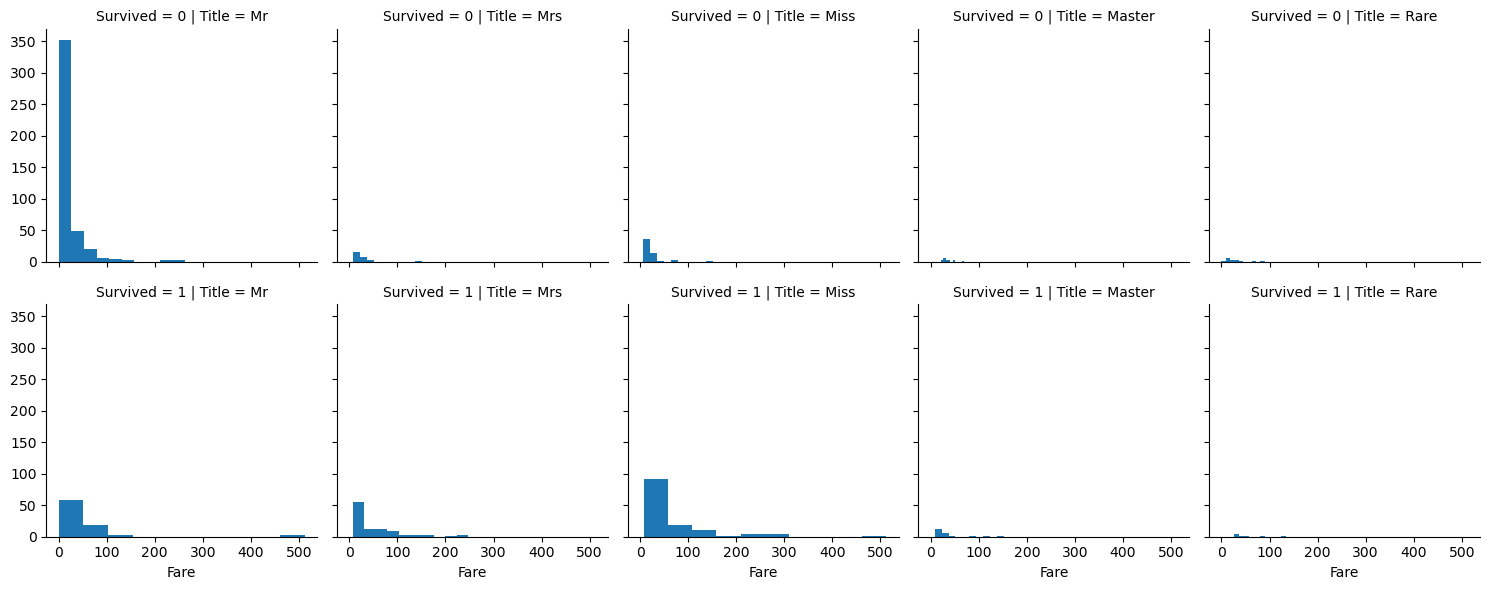

In [68]:
graph = sns.FacetGrid(train_data, row='Survived', col='Title')
graph.map(plt.hist, 'Fare')

### Family

In [69]:
train_data['Family'] = train_data['SibSp'] + train_data['Parch'] + 1

In [70]:
train_data['Survived'].corr(train_data['Family'])

0.01663898928274532

In [71]:
train_data[['Survived', 'Family']].groupby(['Family']).mean().sort_values('Survived', ascending=False)

,Survived
Family,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


<Axes: xlabel='Pclass', ylabel='Survived'>

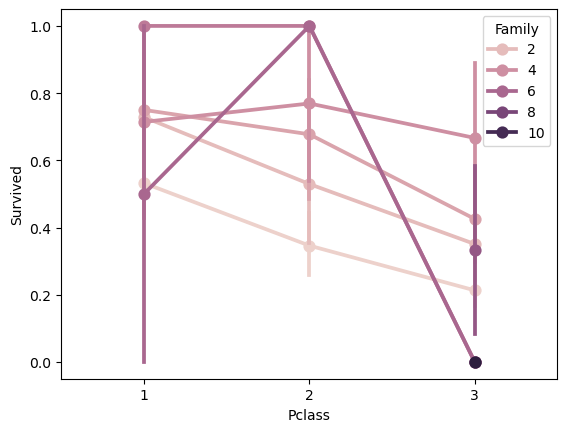

In [72]:
sns.pointplot(train_data, x='Pclass', y='Survived', hue='Family')

<Axes: xlabel='Sex', ylabel='Survived'>

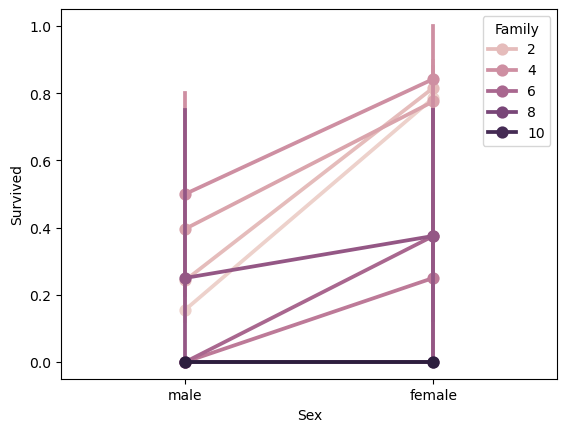

In [73]:
sns.pointplot(train_data, x='Sex', y='Survived', hue='Family')

<Axes: xlabel='Embarked', ylabel='Survived'>

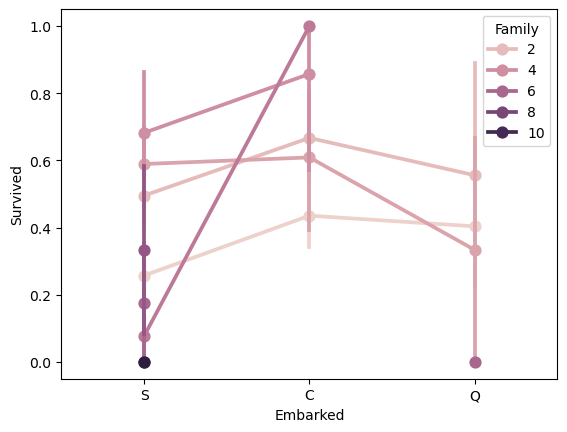

In [74]:
sns.pointplot(train_data, x='Embarked', y='Survived', hue='Family')

<Axes: xlabel='Title', ylabel='Survived'>

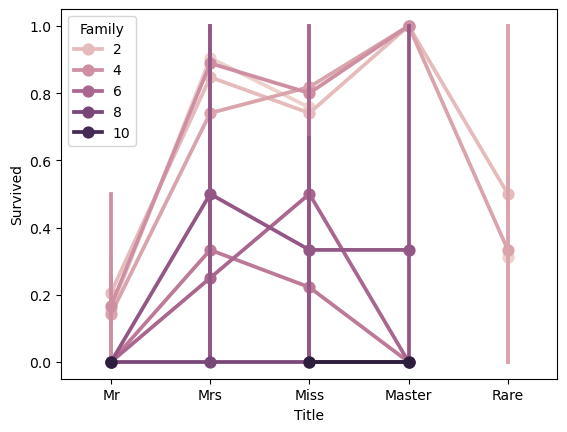

In [75]:
sns.pointplot(train_data, x='Title', y='Survived', hue='Family')

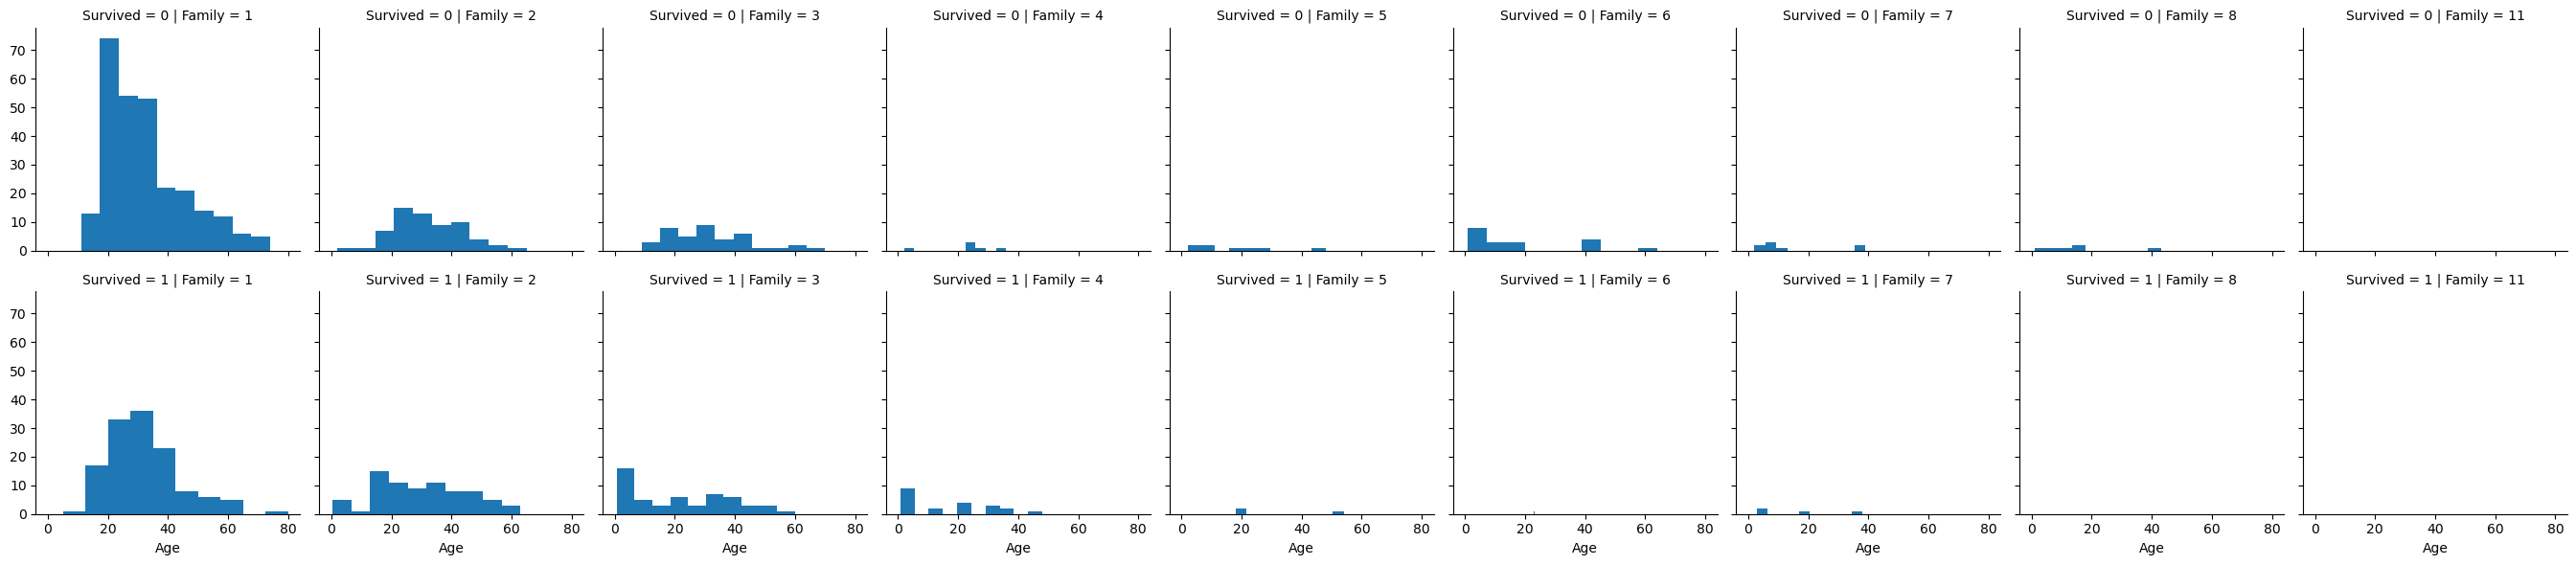

In [76]:
graph = sns.FacetGrid(train_data, row='Survived', col='Family', dropna=True)
graph.map(plt.hist, 'Age')

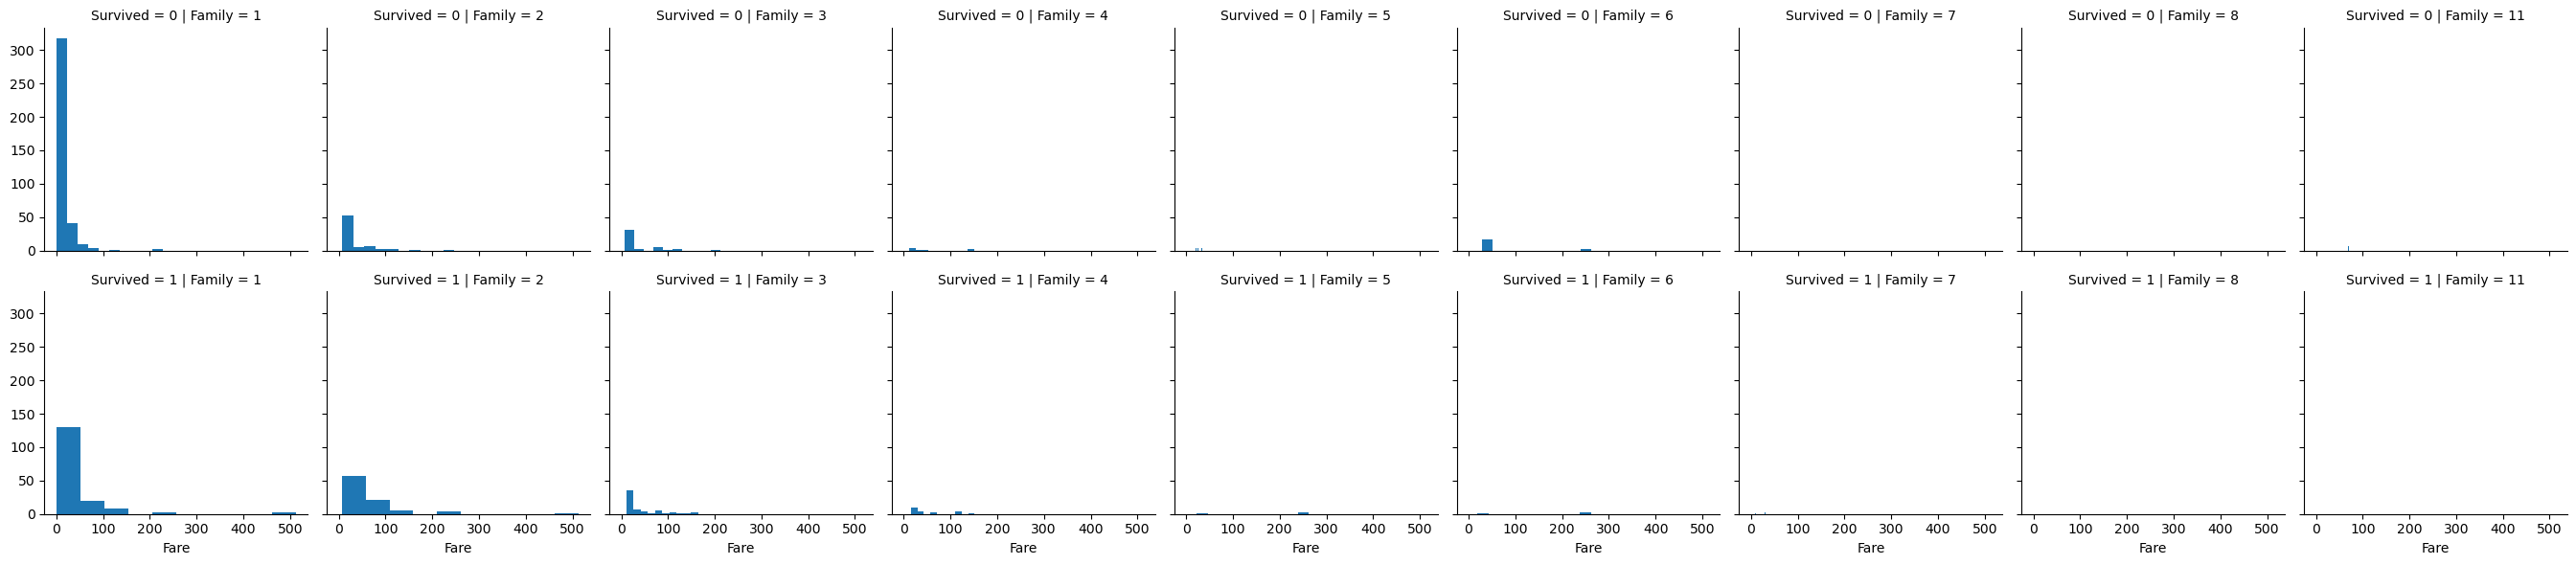

In [77]:
graph = sns.FacetGrid(train_data, row='Survived', col='Family', dropna=True)
graph.map(plt.hist, 'Fare')

### Alone

In [78]:
train_data['Alone'] = 0
train_data.loc[train_data['Family'] == 1, 'Alone'] = 1
train_data[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean()

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [79]:
train_data['Survived'].corr(train_data['Alone'])

-0.20336708569989215

<Axes: xlabel='Pclass', ylabel='Survived'>

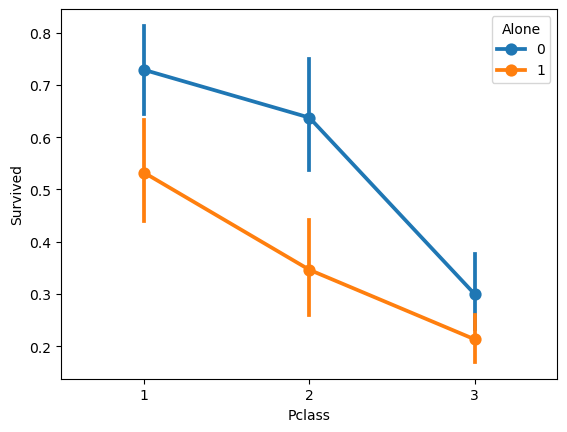

In [80]:
sns.pointplot(train_data, x='Pclass', y='Survived', hue='Alone')

<Axes: xlabel='Embarked', ylabel='Survived'>

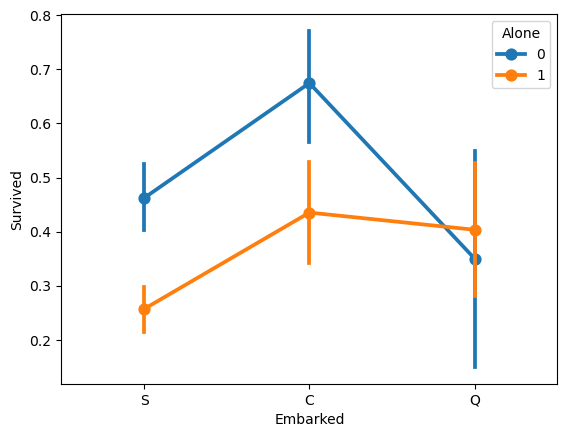

In [81]:
sns.pointplot(train_data, x='Embarked', y='Survived', hue='Alone')

<Axes: xlabel='Title', ylabel='Survived'>

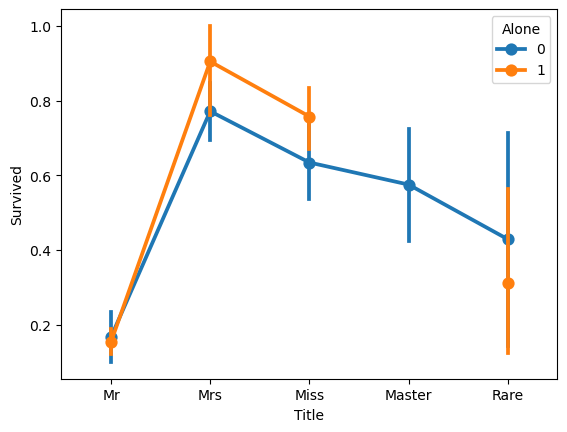

In [82]:
sns.pointplot(train_data, x='Title', y='Survived', hue='Alone')

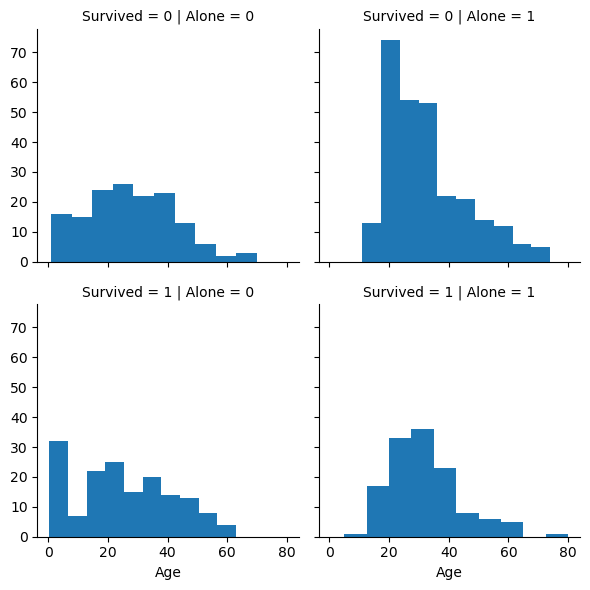

In [83]:
graph = sns.FacetGrid(train_data, row='Survived', col='Alone')
graph.map(plt.hist, 'Age')

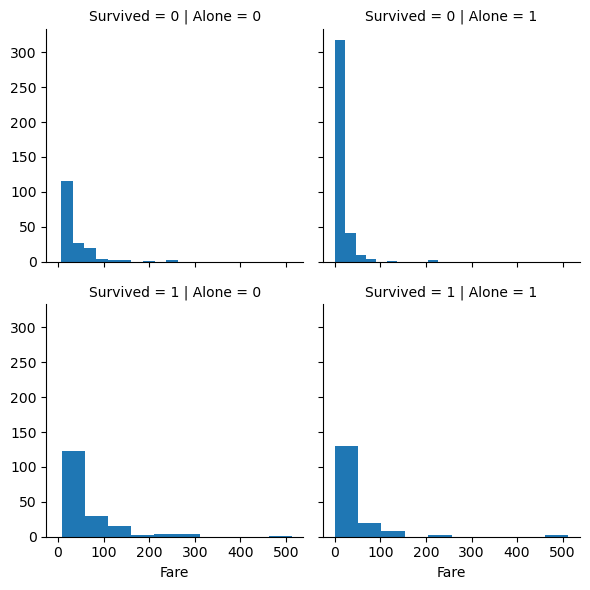

In [84]:
graph = sns.FacetGrid(train_data, row='Survived', col='Alone')
graph.map(plt.hist, 'Fare')

### FareRange

In [85]:
train_data['FareLevel'] = pd.cut(train_data['Fare'], 5)
train_data['FareLevel'].unique()

[(-0.512, 102.466], (204.932, 307.398], (102.466, 204.932], (409.863, 512.329]]
Categories (5, interval[float64, right]): [(-0.512, 102.466] < (102.466, 204.932] < (204.932, 307.398] < (307.398, 409.863] < (409.863, 512.329]]

In [86]:
train_data['FareRange'] = pd.cut(train_data['Fare'], 5, labels=[0,1,2,3,4])

In [87]:
train_data[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)

C:\Users\ccis229c\AppData\Local\Temp\ipykernel_6120\3077285147.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)


,FareRange,Survived
0,0,0.361575
1,1,0.757576
2,2,0.647059
3,3,NaN
4,4,1.000000


In [88]:
train_data['Survived'].corr(train_data['FareRange'])

0.16578014598315877

<Axes: xlabel='Pclass', ylabel='Survived'>

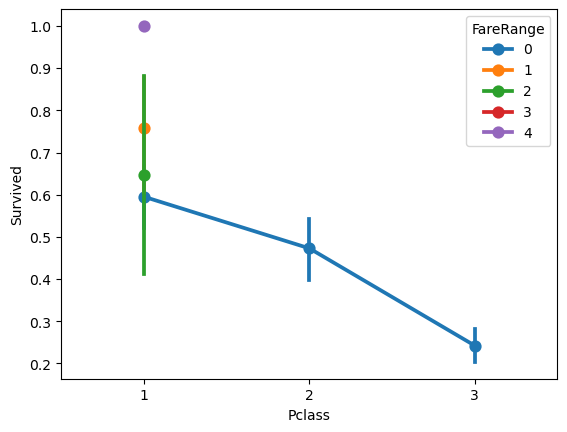

In [89]:
sns.pointplot(train_data, x='Pclass', y='Survived', hue='FareRange')

<Axes: xlabel='SibSp', ylabel='Survived'>

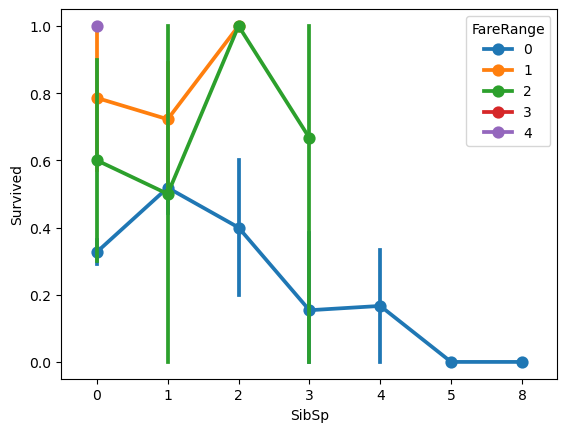

In [90]:
sns.pointplot(train_data, x='SibSp', y='Survived', hue='FareRange')

<Axes: xlabel='Parch', ylabel='Survived'>

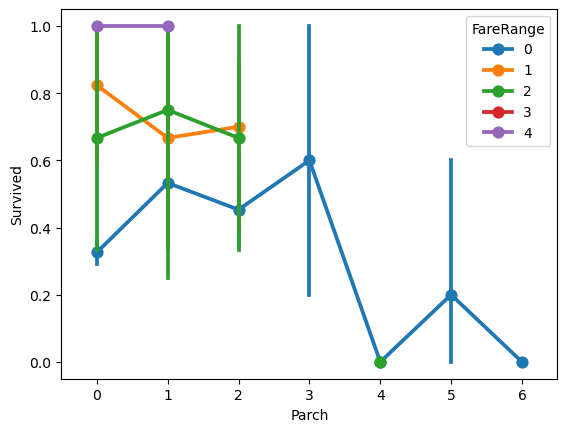

In [91]:
sns.pointplot(train_data, x='Parch', y='Survived', hue='FareRange')

<Axes: xlabel='Embarked', ylabel='Survived'>

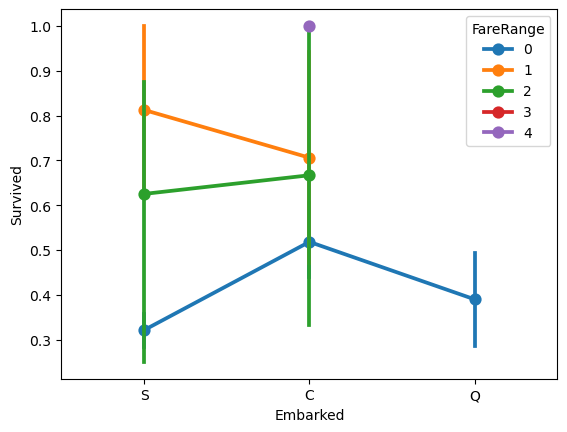

In [92]:
sns.pointplot(train_data, x='Embarked', y='Survived', hue='FareRange')

<Axes: xlabel='Title', ylabel='Survived'>

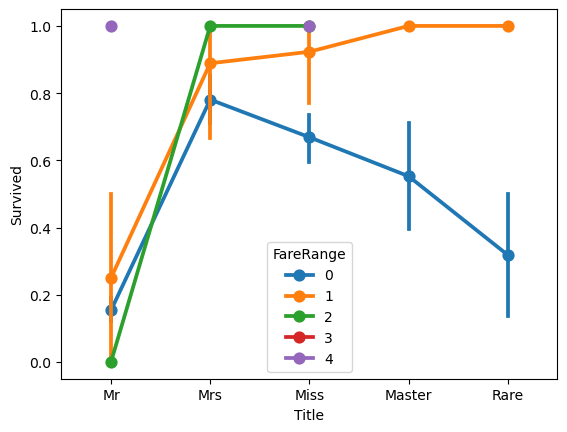

In [93]:
sns.pointplot(train_data, x='Title', y='Survived', hue='FareRange')

<Axes: xlabel='Family', ylabel='Survived'>

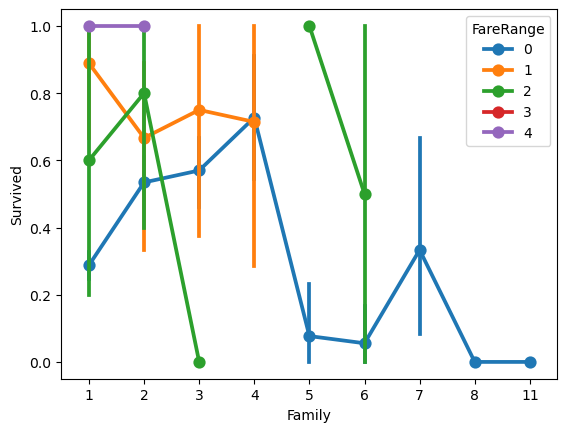

In [95]:
sns.pointplot(train_data, x='Family', y='Survived', hue='FareRange')

<Axes: xlabel='Alone', ylabel='Survived'>

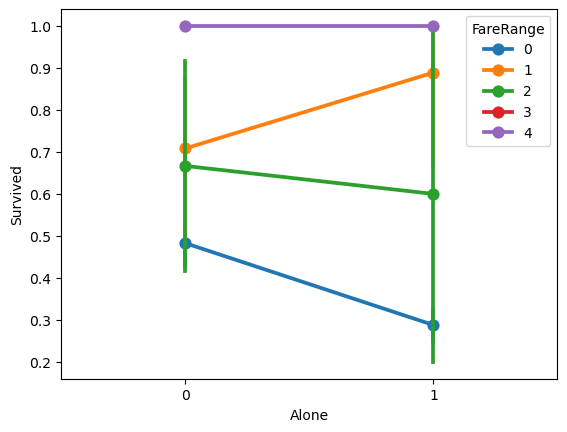

In [96]:
sns.pointplot(train_data, x='Alone', y='Survived', hue='FareRange')

### AgeRange

In [97]:
train_data['AgeLevel'] = pd.cut(train_data['Age'], 5)
train_data['AgeLevel'].unique()

[(16.336, 32.252], (32.252, 48.168], NaN, (48.168, 64.084], (0.34, 16.336], (64.084, 80.0]]
Categories (5, interval[float64, right]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [98]:
train_data['AgeRange'] = pd.cut(train_data['Age'], 5, labels=[0,1,2,3,4])

In [99]:
train_data[['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean().sort_values(by='AgeRange', ascending=True)

C:\Users\ccis229c\AppData\Local\Temp\ipykernel_6120\1673538587.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data[['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean().sort_values(by='AgeRange', ascending=True)


,AgeRange,Survived
0,0,0.550000
1,1,0.369942
2,2,0.404255
3,3,0.434783
4,4,0.090909


In [100]:
train_data['Survived'].corr(train_data['AgeRange'])

-0.06770922716441012

<Axes: xlabel='Pclass', ylabel='Survived'>

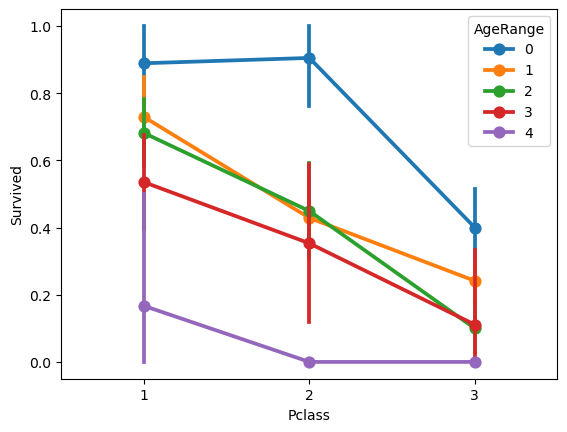

In [101]:
sns.pointplot(train_data, x='Pclass', y='Survived', hue='AgeRange')

<Axes: xlabel='SibSp', ylabel='Survived'>

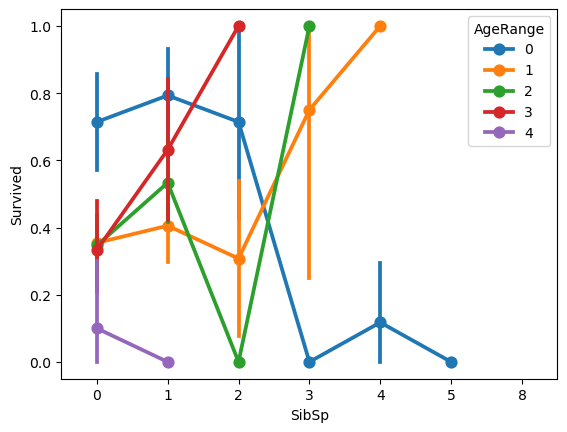

In [102]:
sns.pointplot(train_data, x='SibSp', y='Survived', hue='AgeRange')

<Axes: xlabel='Parch', ylabel='Survived'>

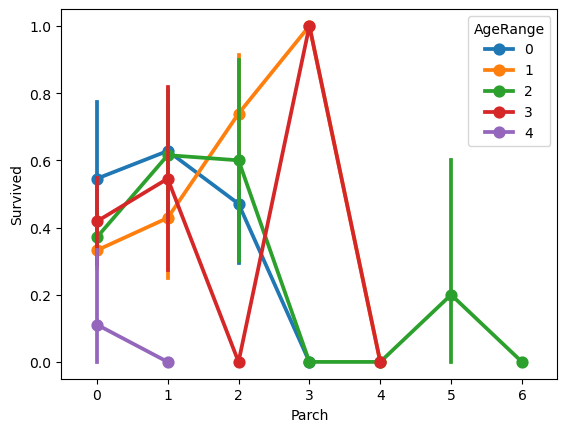

In [103]:
sns.pointplot(train_data, x='Parch', y='Survived', hue='AgeRange')

<Axes: xlabel='Embarked', ylabel='Survived'>

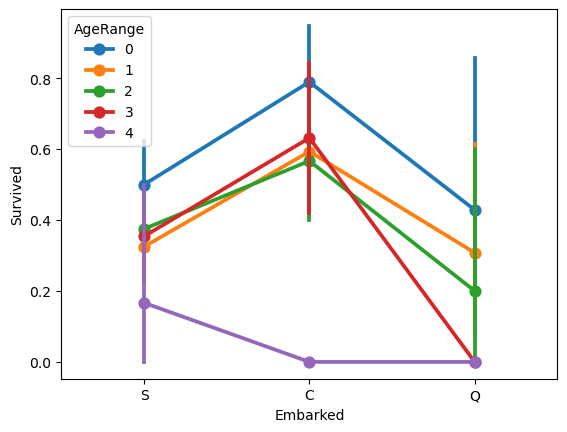

In [104]:
sns.pointplot(train_data, x='Embarked', y='Survived', hue='AgeRange')

<Axes: xlabel='Title', ylabel='Survived'>

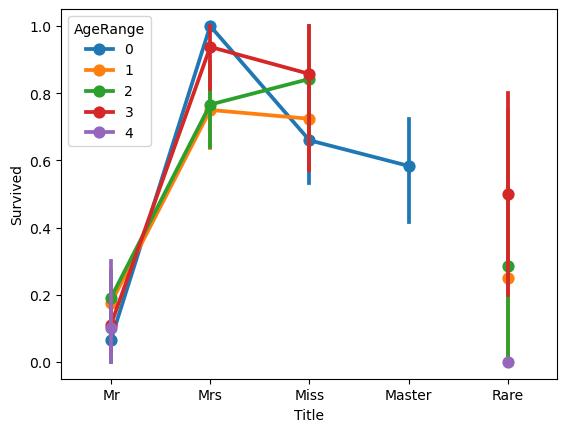

In [105]:
sns.pointplot(train_data, x='Title', y='Survived', hue='AgeRange')

<Axes: xlabel='Family', ylabel='Survived'>

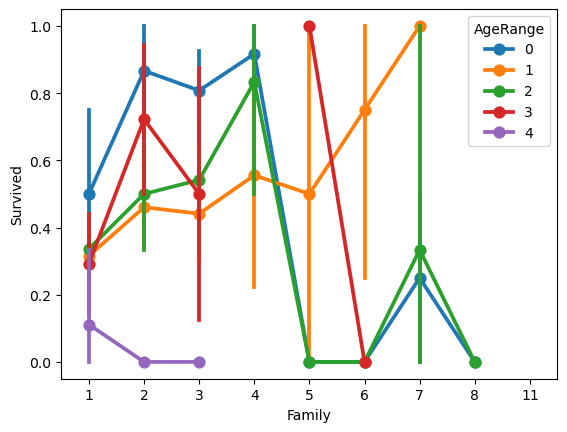

In [106]:
sns.pointplot(train_data, x='Family', y='Survived', hue='AgeRange')

<Axes: xlabel='Alone', ylabel='Survived'>

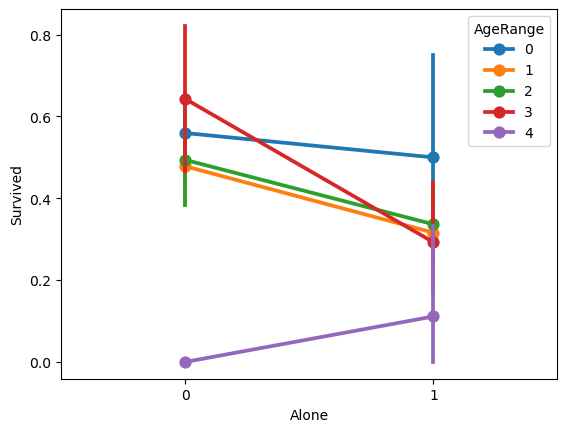

In [107]:
sns.pointplot(train_data, x='Alone', y='Survived', hue='AgeRange')

### TicketNumber

In [108]:
def get_ticket_number(ticket):
    return ticket.split(' ')[-1]

In [109]:
train_data['TicketNumber'] = train_data['Ticket'].apply(get_ticket_number)

In [110]:
train_data[['TicketNumber', 'Survived']].groupby(['TicketNumber'], as_index=False).mean().sort_values(by='TicketNumber', ascending=True)

,TicketNumber,Survived
0,10482,1.000000
1,110152,1.000000
2,110413,0.666667
3,110465,0.000000
4,110564,1.000000
...,...,...
674,8475,0.000000
675,851,0.000000
676,9234,1.000000
677,9549,1.000000


In [111]:
train_data.loc[train_data['TicketNumber'] == 'LINE', 'TicketNumber'] = -1

In [112]:
train_data['Survived'].corr(train_data['TicketNumber'])

-0.09560543706522012

### TicketPrefix

In [113]:
def get_ticket_prefix(ticket):
    items = ticket.split(' ')
    if len(items) == 1:
        return 'None'
    return '_'.join(items[:-1])

In [114]:
train_data['TicketPrefix'] = train_data['Ticket'].apply(get_ticket_prefix)

In [115]:
train_data[['TicketPrefix', 'Survived']].groupby(['TicketPrefix'], as_index=False).mean().sort_values(by='TicketPrefix', ascending=True)

,TicketPrefix,Survived
0,A./5.,0.000000
1,A.5.,0.000000
2,A/4,0.000000
3,A/4.,0.000000
4,A/5,0.100000
5,A/5.,0.142857
6,A/S,0.000000
7,A4.,0.000000
8,C,0.400000
9,C.A.,0.481481
